#### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##### Описание данных

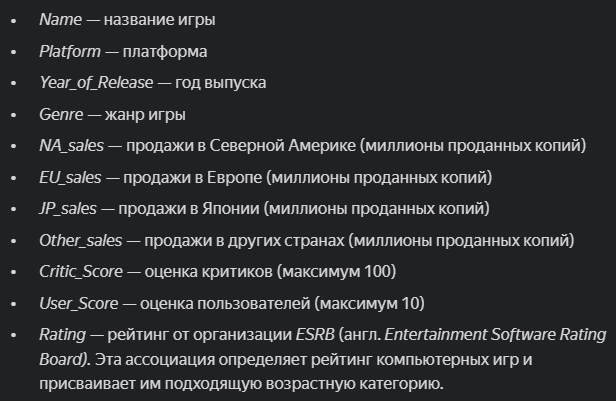

#### Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем бибилиотеки

In [1]:
#Импортируем "базовый" набор библиотек. Если что-то еще понадобится, то доимпортируем в процессе.
#Добавлено в начале.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#Добавлено по ходу.

import re
import seaborn as sns

Откроем датасет

In [2]:
game_data = pd.read_csv('/datasets/games.csv')

Изучим общую информацию

In [3]:
print(game_data.head())
game_data.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

Видим пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`.  
Также `Year_of_Release` имеет формат `float64`, нужно перевести. `Critic_Score, User_Score` привести к другому типу.  
Также нужно привести все имена столбцов к "змеиному языку".

In [4]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

Замечены пропущенные значения в некоторых столбцах. Выявлена необходимость привести названия столбцов к "змеиному языку".

#### Шаг 2. Подготовьте данные

+ Замените названия столбцов (приведите к нижнему регистру);
+ Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
+ Обработайте пропуски при необходимости:
    + Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    + Опишите причины, которые могли привести к пропускам;
    + Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
+ Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

##### Замените названия столбцов (приведите к нижнему регистру).

In [5]:
game_data.columns= game_data.columns.str.lower()
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь все названия в lowercase.

##### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

`year_of_release` приведем к `int`, данный столбец хранит года релиза игр. Должно быть целым числом.  
`user_score` нужно привести `float`, в столбце дробные значения пользовательского рейтинга.

In [6]:
game_data['year_of_release'] = pd.to_numeric(game_data['year_of_release'], errors='coerce').astype('Int64')
game_data['user_score'] = pd.to_numeric(game_data['user_score'], errors='coerce').astype(float)

In [7]:
print(game_data.head())
game_data.info()

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (tot

Типы данных исправлены.

Проверим явные дубликаты

In [8]:
print('Кол-во явных дубликатов:', game_data.duplicated().sum())

Кол-во явных дубликатов: 0


Была предпринята попытка посмотреть неявные дубликаты, используя сначала код ниже, а потом на основании полученных пар, мог быть применен `.replace`, но данная цикл очень долго загружался.

In [9]:
"""from fuzzywuzzy import fuzz

threshold = 100 # пороговое значение для сравнения
duplicates = []

for name in game_data['name'].unique():
    if pd.notnull(name):  # Проверяем на пропуск
        for other_name in game_data['name'].unique():
            if name != other_name and pd.notnull(other_name) and fuzz.partial_ratio(name, other_name) >= threshold:
                duplicates.append((name, other_name))
            
duplicates"""

"from fuzzywuzzy import fuzz\n\nthreshold = 100 # пороговое значение для сравнения\nduplicates = []\n\nfor name in game_data['name'].unique():\n    if pd.notnull(name):  # Проверяем на пропуск\n        for other_name in game_data['name'].unique():\n            if name != other_name and pd.notnull(other_name) and fuzz.partial_ratio(name, other_name) >= threshold:\n                duplicates.append((name, other_name))\n            \nduplicates"

##### Обработайте пропуски при необходимости.

Посмотрим сколько пропусков в датафрейме в общем.

In [10]:
game_data.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

В `name` и `genre` пропусков всего два. Начнем работу с них.

In [11]:
game_data.loc[game_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски сразу и в названии жанра, и в имени, и в оценке критиков, и в оценке пользователей, и в рейтинге. Удалим эти строки.

In [12]:
game_data = game_data.dropna(subset = ['name'])
game_data.isna().sum().sort_values(ascending=False)

user_score         9123
critic_score       8576
rating             6764
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Отлично. Перейдем к `year_of_release`. Сначла кое-что проверим.

In [13]:
game_data.query('(name.str.contains("FIFA|NHL|NFL|MLS|19|20", case=False)) & (year_of_release.isna())')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2479,Madden NFL 07,PSP,<NA>,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2492,MLB SlugFest 20-03,PS2,<NA>,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,<NA>,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
2849,Madden NFL 11,Wii,<NA>,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3413,Madden NFL 06,X360,<NA>,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
3486,Madden NFL 2002,XB,<NA>,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E


Такие игры как FIFA, NHL, Madden NFL и подобные, чаще всего имеют в своих названиях год, например, Madden NFL 11. Madden NFL 11 означает, что эта часть посвящена сезону 2011 года. Такие игры выходят за год до сезона, цифру которого они имеют в названии. Например, 11ая вышла в августе 2010ого. Мы можем найти такие названия, выбрать оттуда год и из него вычесть 1, чтобы получить год выпуска. 
Напишем две функции. Одна будет смотреть четырехзначные года в названии игр, другая двухзначные.

In [14]:
#Поиск четырехзначных обозначений года
def extract_year_fourdigit(game_name, fmt='%Y'):
    extract_year_fourdigit = re.findall("(?<!\d)\d{4}(?!\d)", str(game_name))
    if len(extract_year_fourdigit):
      year = int(extract_year_fourdigit[-1]) - 1
      return year

In [15]:
#Поиск двухзначных обозначений года
def extract_year_doubledigit(game_name, fmt='%Y'):
    extract_year_fourdigit = re.findall("(?<!\d)\d{2}(?!\d)", str(game_name))
    if len(extract_year_fourdigit):
      year = int(extract_year_fourdigit[-1]) - 1 + 2000
      return year

In [16]:
game_data['year_of_release'] = game_data['year_of_release'].fillna(game_data['name'].apply(extract_year_fourdigit))
game_data['year_of_release'] = game_data['year_of_release'].fillna(game_data['name'].apply(extract_year_doubledigit))

Пропуск года для `NHL Slapshot, Unreal Championship 2: The Liandri Conflict, Jet X20, NHL Hitz Pro` заменим мануально, раз уж мы их обнаружили.  

In [17]:
game_data.loc[game_data['name'] == 'NHL Slapshot', 'year_of_release'] = game_data.loc[game_data['name'] == 'NHL Slapshot', 'year_of_release'].fillna(2010)
game_data.loc[game_data['name'] == 'Unreal Championship 2: The Liandri Conflict', 'year_of_release'] = game_data.loc[game_data['name'] == 'Unreal Championship 2: The Liandri Conflict', 'year_of_release'].fillna(2005)
game_data.loc[game_data['name'] == 'Jet X20', 'year_of_release'] = game_data.loc[game_data['name'] == 'Jet X20', 'year_of_release'].fillna(2002)
game_data.loc[game_data['name'] == 'NHL Hitz Pro', 'year_of_release'] = game_data.loc[game_data['name'] == 'NHL Hitz Pro', 'year_of_release'].fillna(2003)

In [18]:
#Проверим
print('Кол-во пропусков в столбце year_of_release для игр, где можно установить год из названия:',len(game_data.query('(name.str.contains("FIFA|NHL|NFL|MLS|19|20", case=False)) & (year_of_release.isna())')))
print('Оставшееся кол-во пропусков в столбце year_of_release:',game_data['year_of_release'].isna().sum())

Кол-во пропусков в столбце year_of_release для игр, где можно установить год из названия: 0
Оставшееся кол-во пропусков в столбце year_of_release: 239


Оставшихся 239 можно удалить. 239 строк из 16715 это меньше 1.5%. Удаление такого количества строк не сильно повлияет.

In [19]:
game_data.dropna(subset=['year_of_release'], inplace=True)

Перейдем к столбцу `raiting`, в столбце рейтинг обзоначается буквами по системе:  
**С** - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.  
**E** - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
**E10+** - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.  
**T** - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.  
**M** - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.  
**AO** - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.  
**RP** - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Проверим, чтобы все записи соответствовали данной системе.

In [20]:
print(game_data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Ага. Есть рейтинг `K-A`. Которого в системе оценивания нет. Данный рейтинг в 1998 был заменен на `E`. `EC` также был выведен и заменен на `E`. Заменим его и в нашем датаферейме.

In [21]:
game_data.loc[game_data['rating'] == 'K-A', 'rating'] = 'E'
game_data.loc[game_data['rating'] == 'EC', 'rating'] = 'E'
game_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Данный столбец содержит категориальные переменные, поэтом можно заменить на какой-то индикатор. Например `'unknown'`.

In [22]:
game_data['rating'] = game_data['rating'].fillna('unknown')
game_data.isna().sum().sort_values(ascending=False)

user_score         8992
critic_score       8470
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

Последним, но не по важности, будет заполнить пропуски в `user_score, critic_score`.  
Думаю, что единственным вариантом будет заменить пропуски на какое-то контрастное значение. Пропуски можно заполнить чем-то, что указывало бы на отсутствие информации, например, отрицательным числом или значением "-1". Такой подход сохраняет информацию о пропущенных значениях и не искажает статистику в дальнейшем анализе.

In [23]:
game_data['user_score'].fillna(-1, inplace=True)
game_data['critic_score'].fillna(-1, inplace=True)
game_data.isna().sum().sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски в датафрейме успешно заполнены.

###### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.

В `name` и `genre` пропусков было всего два, их мы просто дропнули.  
Пропуски в `year_of_release` были заменены для тех игр, из имени которых можно было вычленить год. Остальные были удалены, так как составляли меньше 1.5% данных датафрейма.
В столбце `rating` пропуски заменены на `unknown`, потому что данный столбец содержит категориальные переменные.
Чтобы сохранить информацию о пропущенных значениях и не исказить статистику в дальнейшем анализе, пропуски в `user_score` и `critic_score` заменены на то, что указывает на отсутствие информации, в нашем случае, значением "-1".

###### Опишите причины, которые могли привести к пропускам.

* Отсутствие данных: Иногда данные просто не собираются или не записываются, из-за технических проблем, ошибок в системе, или по каким-то другим причинам.
* Человеческий фактор: Иногда пропуски могут возникать из-за ошибок ввода данных или неполного сбора информации.

###### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать.

`'tbd'` может обозначать `'to be determined'`. Чаще всего обозначает то, что итоговое значение еще не утверждено. По сути такой же пропуск. Заменим и его на `'-1'`

In [24]:
game_data.replace('tbd', -1, inplace=True)

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбе.

In [50]:
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']
game_data[['name', 'total_sales']]

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38
...,...,...
16710,Samurai Warriors: Sanada Maru,0.01
16711,LMA Manager 2007,0.01
16712,Haitaka no Psychedelica,0.01
16713,Spirits & Spells,0.01


**Вывод**

Все названия столбцов приведены к нижнему регистру для унификации.  
Исправлены типы данных в соответствии с их содержимым.  
Пропуски в столбцах с названием игры и жанром были минимальны и были удалены. Пропуски в годе выпуска игр были заполнены, используя информацию из названия игр, где это возможно. Остальные пропущенные значения были удалены, так как их доля составляла менее 1.5% от общего объема данных. Пропуски в столбцах с рейтингами и оценками были заменены на значение "unknown" и "-1" соответственно, чтобы сохранить информацию о пропущенных данных.  
Причины возникновения пропусков могут быть разнообразными, включая технические проблемы и человеческий фактор, такие как ошибки ввода данных.  
На этапе предобработки данных были обработаны явные дубликаты, заполнены пропущенные значения и добавлен столбец с суммарными продажами во всех регионах. Это позволит проводить более точный анализ данных и извлекать полезную информацию из них.

#### Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [26]:
#сводная таблица с годами выпуска игр и их кол-вом.
years = game_data[(game_data['year_of_release'] > 0) & (game_data['year_of_release'] < 2024)].pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc='count').sort_values('year_of_release', ascending=True)

years.rename(columns={'name': 'quantity'}, inplace=True)
years

,quantity
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


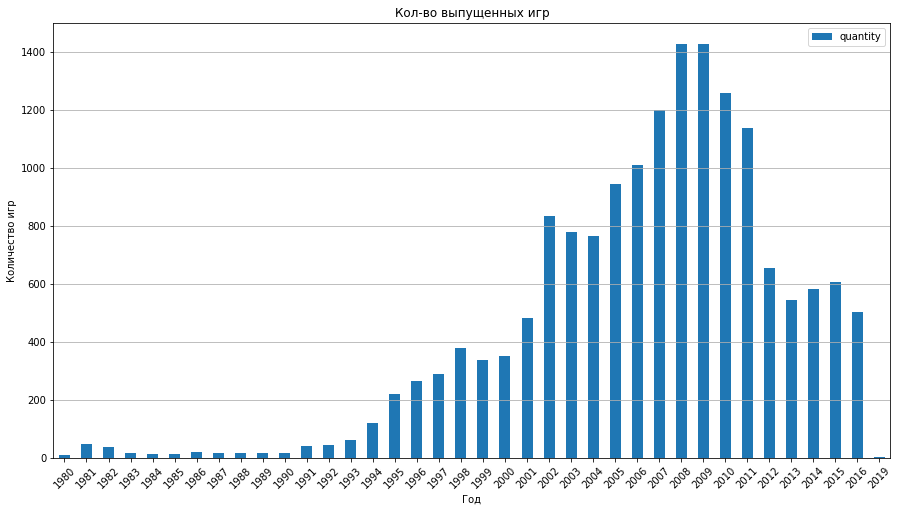

In [27]:
#График
years.plot(kind='bar', figsize=(15, 8))
plt.title('Кол-во выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Видим пики увелечения количества проданных игр, которые соответствуют ключевым событиям в игровой индустрии. Например, 1994 - выход PS1, 2001 - выход Windows XP, полномасштабный запуск PS2, 2007 - выход PS3.  
С 2011 года можно наблюдать стагнацию, которая может быть вызвана несколькими факторами:
* **Насыщение рынка**: Рынок компьютерных игр может столкнуться с насыщением, когда количество выпускаемых игр достигает определенного предела, а спрос на них остается стабильным или снижается. Это может привести к уменьшению инноваций и разнообразия игр, что может уменьшить интерес к рынку в целом. Там и рассвет Call of Duty, все еще конкурентоспособная BattleField, Medal of Honor, вменяемые Need For Speed, Assassin's creed, Starcraft 2, Mafia 2, Dead Space и т.д.
* **Изменения в потребительском поведении**: Изменения в предпочтениях и поведении потребителей могут также повлиять на спрос на компьютерные игры. Например, увеличение популярности мобильных игр или изменения в образе жизни могут привести к снижению интереса к играм на ПК или консолях.
* **Технологический стагнация**: В некоторых случаях, рынок может столкнуться с технологической стагнацией, когда новые технологии или идеи не появляются достаточно быстро, чтобы стимулировать рост. Это может быть связано с ограничениями аппаратного обеспечения, изменениями в законодательстве или другими факторами.

Стоит рассматривать рынок игры лишь с 1993, так до этого годжа продаж очень мало.

##### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

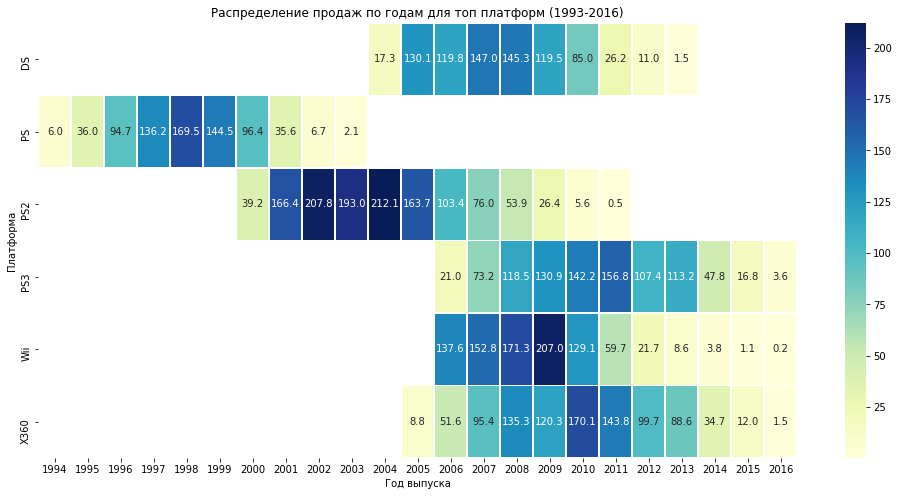

In [28]:
# Фильтрация данных по годам выпуска
game_data_filtered = game_data[(game_data['year_of_release'] >= 1993) & (game_data['year_of_release'] <= 2016)]

# Находим суммарные продажи для каждой платформы
platform_total_sales = game_data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбираем топ платформ
top_platforms = platform_total_sales.head(6)

# Фильтруем данные только для выбранных платформ
top_platform_data = game_data_filtered[game_data_filtered['platform'].isin(top_platforms.index)]

# Строим распределение продаж по годам для каждой платформы
platform_sales_distribution = top_platform_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

# Строим график
plt.figure(figsize=(17, 8))
sns.heatmap(platform_sales_distribution, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Распределение продаж по годам для топ платформ (1993-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.show()

Глядя на график, можем сказать, что среднее время "жизни" платформ 7 лет. Далее кол-во продаж почти полностью сокращается. Например, у "конвеерных" консолей типа ПС обновление поколений происходит раз в 6 лет. ПС1 с 95ого по 2001, затем была ПС2 до 2007, ПС3 до 2014ого, пока не была заменена на ПС4. Игроки начинают смело покупать игры после полугода-года присутствия консоли на рынке, изучив ее надежность и фичи, которые она может предложить, а также дождавшись привлекательных эксклюзивов. Каждое предыдущее поколение еще какое-то время держится на плаву, возможно, засчет удешевления игр.

##### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Проанализировав предыдущий график, был сделан вывод о том, что среднее время "жизни" платформ 7 лет. Поэтому для прогноза на 2017ый нужно взять данные от 2010ого.

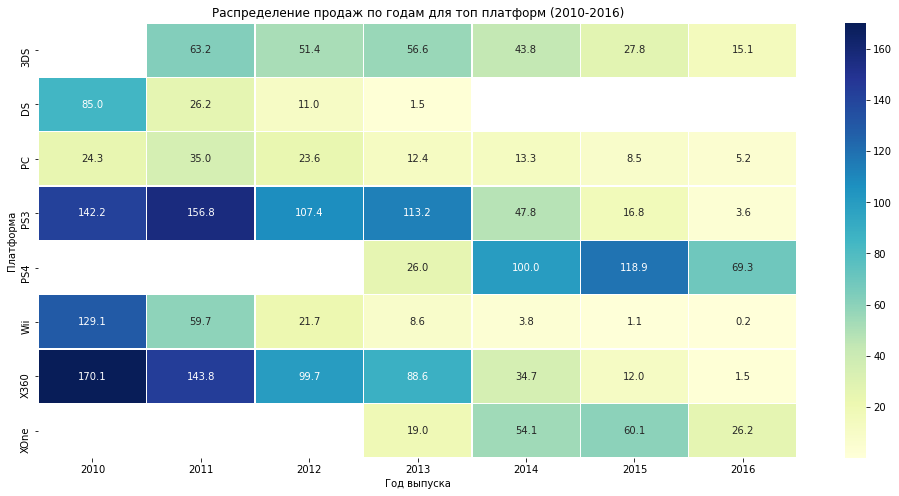

In [29]:
# Фильтрация данных по годам выпуска
game_data_filtered = game_data[(game_data['year_of_release'] >= 2010) & (game_data['year_of_release'] <= 2016)]

# Находим суммарные продажи для каждой платформы
platform_total_sales = game_data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбираем топ платформ
top_platforms = platform_total_sales.head(8)

# Фильтруем данные только для выбранных платформ
top_platform_data = game_data_filtered[game_data_filtered['platform'].isin(top_platforms.index)]

# Строим распределение продаж по годам для каждой платформы
platform_sales_distribution = top_platform_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

# Строим график
plt.figure(figsize=(17, 8))
sns.heatmap(platform_sales_distribution, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Распределение продаж по годам для топ платформ (2010-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.show()

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Отличный анализ, здорово, что визуализировал данные. </div>


##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

На графике видно, что по продажам лидируют Sony со своими Playstation 3 и 4, Microsoft с Xbox 360 и One. Также видно существенное падение для 3DS, возможно, из-за анонса Nintendo Switch в Марте-2015ого. Видно падение Wii, возможно из-за Playstation Move и XBox Kinect. Рынок игр на ПК пребывает в стагнации.  
Если выбирать самые прибыльные, то это будут **Sony PS4, Xbox One, 3DS и ПК**.

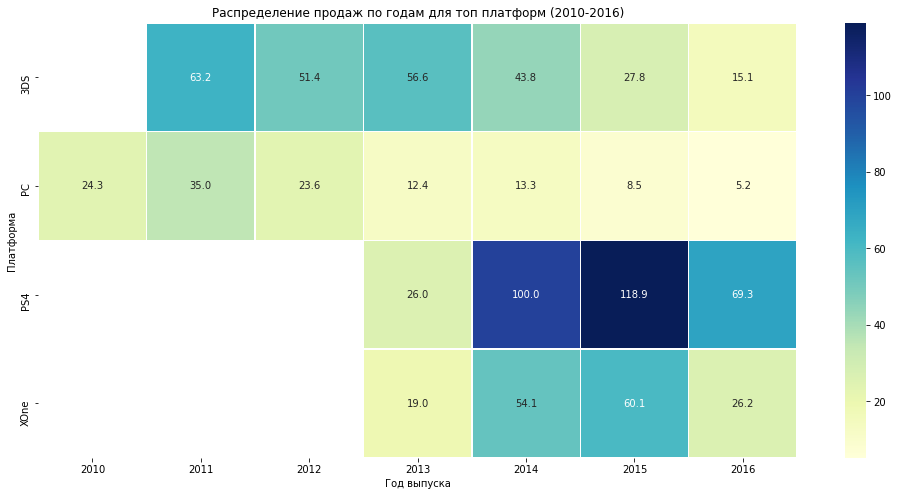

In [30]:
# Добавляем условие для выбора только игр для платформ PS4, XOne, 3DS и PC
selected_platforms = ['PS4', 'XOne', '3DS', 'PC']
selected_platform_data = top_platform_data[top_platform_data['platform'].isin(selected_platforms)]

# Строим распределение продаж по годам для каждой платформы
selected_platform_sales_distribution = selected_platform_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

# Строим график
plt.figure(figsize=(17, 8))
sns.heatmap(selected_platform_sales_distribution, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Распределение продаж по годам для топ платформ (2010-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.show()

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Перспективные платформы определены корректно. </div>


##### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

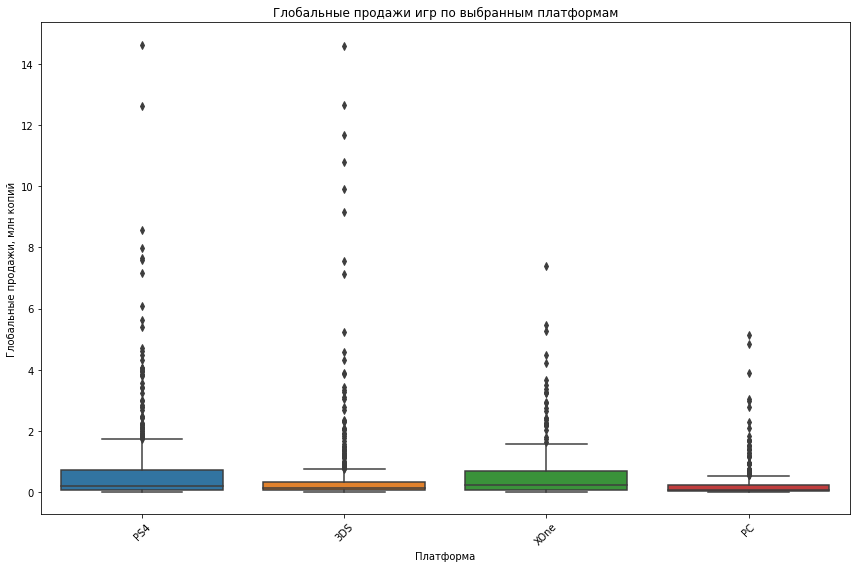

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=selected_platform_data)
plt.title('Глобальные продажи игр по выбранным платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн копий')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На графике видно, что некоторые игры для каждой из платформ, имели успех выше, чем другие, но это скорее исключение. Нужно ограничить диапазон, чтобы получше рассмотреть данные. Ограничим 5 млн. копий, т.к. на графике выше это число выглядит как своеобразный рубеж.

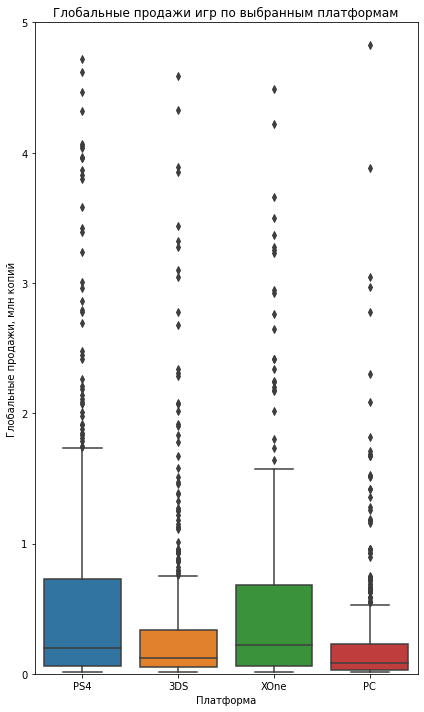

In [32]:
plt.figure(figsize=(6, 10))
sns.boxplot(x='platform', y='total_sales', data=selected_platform_data)
plt.title('Глобальные продажи игр по выбранным платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн копий')
plt.xticks(rotation=0)
plt.yticks(range(0,6,1))
plt.tight_layout()
plt.ylim(0, 5)
plt.show()

Видно, что главные конкуренты на рынке консолей, Xbox и PS, идут в ровень в плане продаж. Их 1ые и 3ьи квартили совпадают. Равно как и среднее значение продаж. На графике видно, что у PS больше успешных игр, например, это могут быть эксклюзивы, один God Of War или Uncharted чего только стоят.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Отличный анализ медианных и топовых продаж.  
    
</div>


##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

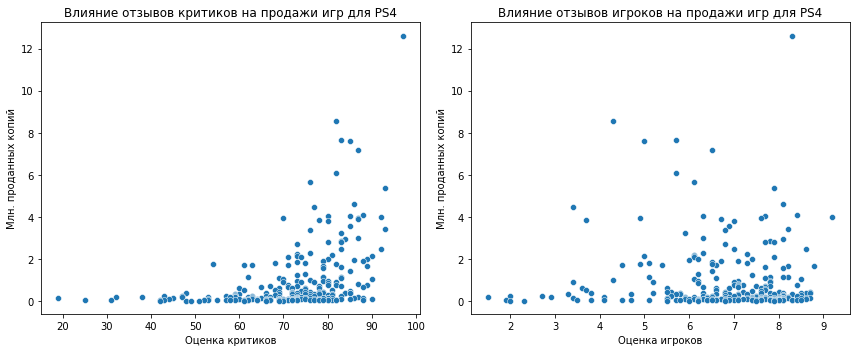

In [33]:
ps4_revenue_critics = game_data[(game_data['platform'] == 'PS4') & (game_data['year_of_release'] >= 2010) & (game_data['year_of_release'] <= 2016) & (game_data['critic_score'] >= 0) & (game_data['user_score'] >= 0)]


#Построение диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=ps4_revenue_critics, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи игр для PS4')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=ps4_revenue_critics, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Влияние отзывов игроков на продажи игр для PS4')
axes[1].set_xlabel('Оценка игроков')
axes[1].set_ylabel('Млн. проданных копий')

plt.tight_layout()

Что мы можем заметить, так это отсутсвие достаточно сильной корреляции в обоих случаях, но корреляция между оценками критиков и продажами выше, чем между продажами и оценкой игроков. Даже не смотря на низкие оценки от игроков, игры все равно пробивали порог в 6млн проданных копий. Также игроки честнее оценивают игры, давая больше низких оценок, чем критики.

##### Соотнесите выводы с продажами игр на других платформах.

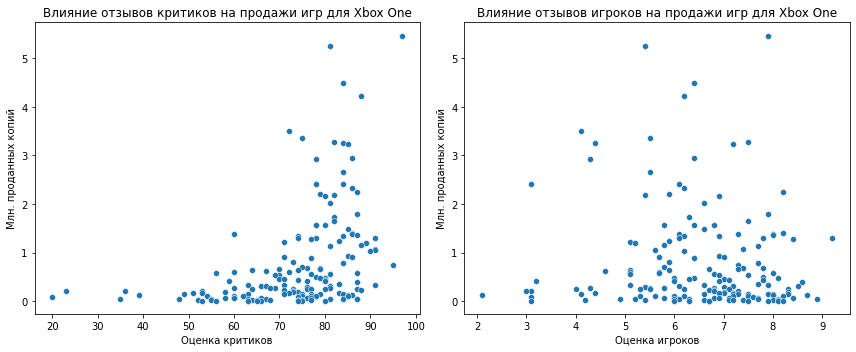

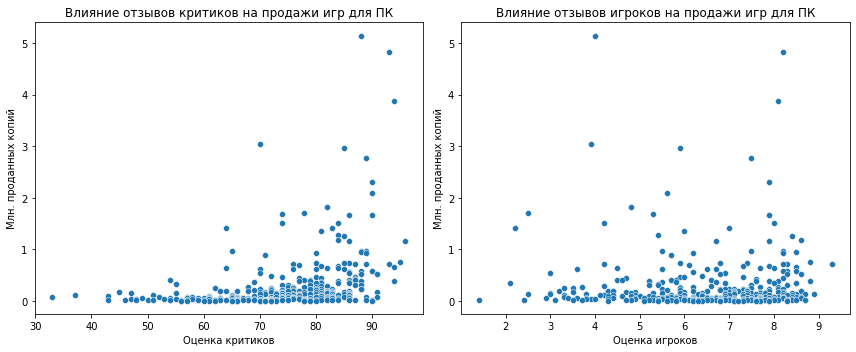

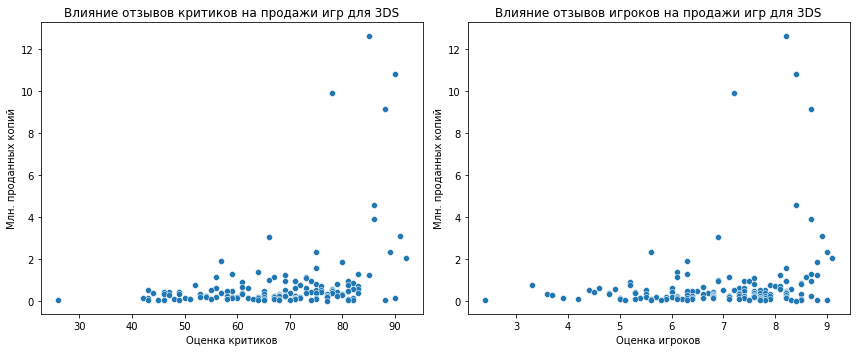

In [34]:
#Для ИкесБокес
xbox_revenue_critics = game_data[(game_data['platform'] == 'XOne') & (game_data['year_of_release'] >= 2010) & (game_data['year_of_release'] <= 2016) & (game_data['critic_score'] >= 0) & (game_data['user_score'] >= 0)]

#Построение диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=xbox_revenue_critics, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи игр для Xbox One')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=xbox_revenue_critics, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Влияние отзывов игроков на продажи игр для Xbox One')
axes[1].set_xlabel('Оценка игроков')
axes[1].set_ylabel('Млн. проданных копий')

plt.tight_layout()


#Для ПК
pc_revenue_critics = game_data[(game_data['platform'] == 'PC') & (game_data['year_of_release'] >= 2010) & (game_data['year_of_release'] <= 2016) & (game_data['critic_score'] >= 0) & (game_data['user_score'] >= 0)]

#Построение диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=pc_revenue_critics, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи игр для ПК')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=pc_revenue_critics, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Влияние отзывов игроков на продажи игр для ПК')
axes[1].set_xlabel('Оценка игроков')
axes[1].set_ylabel('Млн. проданных копий')

plt.tight_layout()


#Для Нинтендо 3ДС
n3ds_revenue_critics = game_data[(game_data['platform'] == '3DS') & (game_data['year_of_release'] >= 2010) & (game_data['year_of_release'] <= 2016) & (game_data['critic_score'] >= 0) & (game_data['user_score'] >= 0)]

#Построение диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=n3ds_revenue_critics, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи игр для 3DS')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=n3ds_revenue_critics, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Влияние отзывов игроков на продажи игр для 3DS')
axes[1].set_xlabel('Оценка игроков')
axes[1].set_ylabel('Млн. проданных копий')

plt.tight_layout()


В целом, среди всех платформ можно заметить более сильную корреляцию между отзывами критиков и продажами. Отзывы игроков меньше влияют на продажи, чем отзывы критиков. Однако, игроки чаще дают низкие оценки играм, чем критики. Ситуация примерно одинакова в случае 3DS. Там влияние оценок игроков и критиков на продажи примерно равно.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, корреляция между продажи и отзывами пользователей отсутствует и очень слабая с отзывами критиков. Стоит присматриваться к экспертному мнению.

</div>


##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

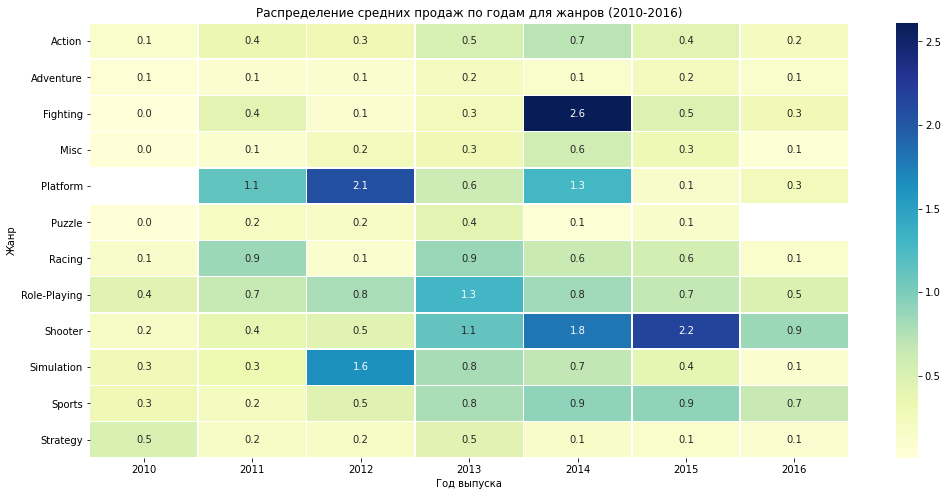

In [36]:
# Отфильтруем данные только для платформ XOne, PS4, PC и 3DS с использованием query
filtered_data = game_data_filtered.query("platform in ['XOne', 'PS4', 'PC', '3DS']")

# Находим средние и медианные продажи для каждого жанра
genre_avg_sales = filtered_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Фильтруем данные только для выбранных жанров
top_genre_data_avg = filtered_data[filtered_data['genre'].isin(genre_avg_sales.index)]

# Строим распределение средних продаж по годам для каждого жанра
genre_avg_sales_distribution = top_genre_data_avg.pivot_table(index='genre', columns='year_of_release', values='total_sales', aggfunc='mean')

# Строим график средних продаж
plt.figure(figsize=(17, 8))
sns.heatmap(genre_avg_sales_distribution, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Распределение средних продаж по годам для жанров (2010-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Жанр')
plt.show()

На графике видно, что жанры 'Shooter', 'Action', 'Role-Playing' и 'Sports' демонстрируют наибольшие продажи, с видимыми пиками в определенные годы. В целом, 'Action' и 'Role-Playing' показывают устойчивые продажи на протяжении нескольких лет, можно говорить о постоянном интересе игроков к играм этих жанров.
Жанры 'Puzzle' и 'Strategy' остаются менее популярными, что отражается на их низких средних продажах.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 

Отлично

**Вывод**
Видны пики увеличения продаж, связанные с ключевыми событиями в индустрии. Однако с 2011 года наблюдается стагнация, что может быть связано с насыщением рынка, изменениями в потребительском поведении и технологической стагнацией.  
Среднее время "жизни" платформ составляет около 7 лет, после чего количество продаж сокращается. Платформы обновляются примерно каждые 6 лет, что влияет на динамику продаж.  
Для прогнозирования на 2017 год были использованы данные с 2010 года, учитывая среднее время "жизни" платформ.  
Лидирующие платформы по продажам - Sony PlayStation и Microsoft Xbox. Наблюдается существенное падение продаж у Nintendo 3DS и Wii, вероятно, из-за конкуренции и технологических изменений.  
Продажи Xbox и PlayStation идут примерно на одном уровне, но у PlayStation больше успешных игр, что может быть связано с качеством эксклюзивов.  
Корреляция между оценками критиков и продажами выше, чем между продажами и оценками игроков. Оценки игроков чаще низкие, но это не всегда отражается на продажах.  
В целом, критики оказывают большее влияние на продажи игр, чем игроки. Однако игроки чаще дают низкие оценки, что может сказаться на репутации игры.  
Жанры 'Shooter', 'Action', 'Role-Playing' и 'Sports' демонстрируют наибольшие продажи, с видимыми пиками в определенные годы. В целом, 'Action' и 'Role-Playing' показывают устойчивые продажи на протяжении нескольких лет, можно говорить о постоянном интересе игроков к играм этих жанров.
Жанры 'Puzzle' и 'Strategy' остаются менее популярными, что отражается на их низких средних продажах.

#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

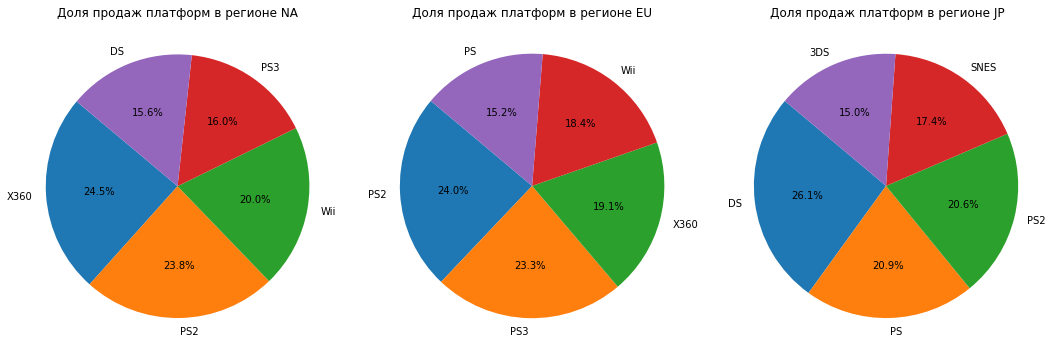

In [37]:
#Группировка данных по регионам и подсчет суммарных продаж для каждой платформы
na_sales = game_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_sales = game_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_sales = game_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

#Выбор топ-5 платформ для каждого региона
top_na_platforms = na_sales.head(5)
top_eu_platforms = eu_sales.head(5)
top_jp_platforms = jp_sales.head(5)

#Подсчет общих продаж для каждого региона
total_na_sales = na_sales.sum()
total_eu_sales = eu_sales.sum()
total_jp_sales = jp_sales.sum()

#Подсчет доли продаж каждой платформы в каждом регионе
na_sales_share = (top_na_platforms / total_na_sales) * 100
eu_sales_share = (top_eu_platforms / total_eu_sales) * 100
jp_sales_share = (top_jp_platforms / total_jp_sales) * 100

#Создание сетки графиков размером 1x3
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Создание круговой диаграммы для региона NA
axs[0].pie(na_sales_share, labels=top_na_platforms.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Доля продаж платформ в регионе NA')
axs[0].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона EU
axs[1].pie(eu_sales_share, labels=top_eu_platforms.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Доля продаж платформ в регионе EU')
axs[1].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона JP
axs[2].pie(jp_sales_share, labels=top_jp_platforms.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Доля продаж платформ в регионе JP')
axs[2].axis('equal')  # Делаем круговую диаграмму круглой

plt.show()

В регионе NA преобладают продажи XBox 360, за ним следуют Wii и оба Playstation. Кстати, в 2024ом в Штатах по продажам лидирует Плойка, за ней идет XBox, а замыкает тройку лидеров Switch. Но что-то мы отдалились.
В Европе лидеры продаж это две Playstation, а тройку замыкает XBox.
В Японском регионе ситуация другая, там люди чаще покупают игры для DS, думаю, это связано с ритмом жизни. Люди в Японии, как известно много времени проводят добираясь на работу и на работе, поэтому важно иметь портативный дивайс. Плэйстешн как локальный бренд замыкают тройку.

**UPD**

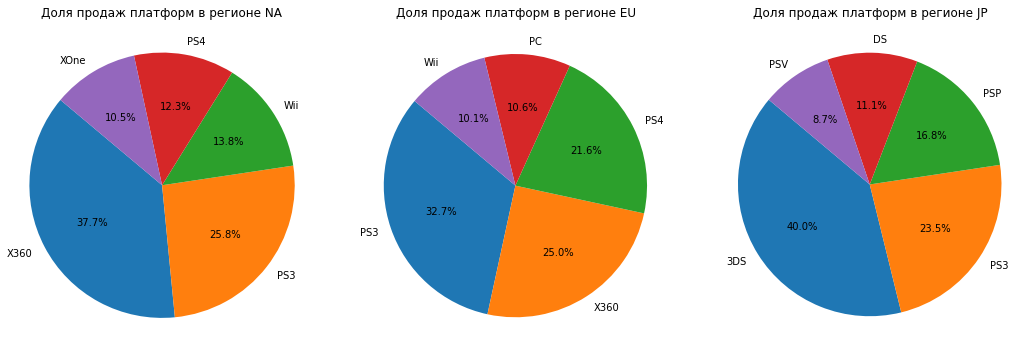

In [38]:
#Группировка данных по регионам и подсчет суммарных продаж для каждой платформы c 2010ого по 2016
na_sales = game_data_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_sales = game_data_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_sales = game_data_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

#Выбор топ-5 платформ для каждого региона
top_na_platforms = na_sales.head(5)
top_eu_platforms = eu_sales.head(5)
top_jp_platforms = jp_sales.head(5)

#Подсчет общих продаж для каждого региона
total_na_sales = na_sales.sum()
total_eu_sales = eu_sales.sum()
total_jp_sales = jp_sales.sum()

#Подсчет доли продаж каждой платформы в каждом регионе
na_sales_share = (top_na_platforms / total_na_sales) * 100
eu_sales_share = (top_eu_platforms / total_eu_sales) * 100
jp_sales_share = (top_jp_platforms / total_jp_sales) * 100

#Создание сетки графиков размером 1x3
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Создание круговой диаграммы для региона NA
axs[0].pie(na_sales_share, labels=top_na_platforms.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Доля продаж платформ в регионе NA')
axs[0].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона EU
axs[1].pie(eu_sales_share, labels=top_eu_platforms.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Доля продаж платформ в регионе EU')
axs[1].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона JP
axs[2].pie(jp_sales_share, labels=top_jp_platforms.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Доля продаж платформ в регионе JP')
axs[2].axis('equal')  # Делаем круговую диаграмму круглой

plt.show()

В регионе NA преобладают продажи XBox 360, за ним следуют PS3, Wii, PS4 и замыкает XOne. Кстати, в 2024ом в Штатах по продажам лидирует Плойка, за ней идет XBox, а замыкает тройку лидеров Switch. Но что-то мы отдалились.  
В Европе лидеры продаж это PS3 c почти 33%, XBox 360 - 25%, далее PS4 - 21.6%, ПК и Wii.  
В Японском регионе ситуация другая, там люди чаще покупают игры для 3DS, думаю, это связано с ритмом жизни. Люди в Японии, как известно, много времени проводят добираясь на работу и на работе, поэтому важно иметь портативный дивайс. Поэтому в топ5 мы видим 3 консоли от Sony, две из которых - портавиные. Это PSP - PlayStation Portabel и PSV - PlayStation Vita. В целом Nintendo держит 50% рынка в Японии.

##### Самые популярные жанры (топ-5). Поясните разницу.

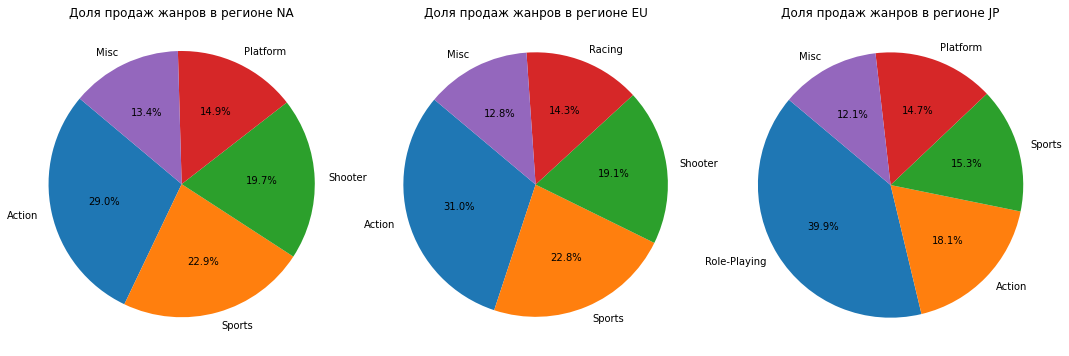

In [39]:
#Группировка данных по регионам и подсчет суммарных продаж для каждого жанра
na_genre_sales = game_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = game_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = game_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

#Выбор топ-5 жанров для каждого региона
top_na_genre = na_genre_sales.head(5)
top_eu_genre = eu_genre_sales.head(5)
top_jp_genre = jp_genre_sales.head(5)

#Подсчет общих продаж для каждого жанра в каждом регионе
total_na_genre_sales = na_genre_sales.sum()
total_eu_genre_sales = eu_genre_sales.sum()
total_jp_genre_sales = jp_genre_sales.sum()

#Подсчет доли продаж каждоого жанра в каждом регионе
na_genre_sales_share = (top_na_genre / total_na_genre_sales) * 100
eu_genre_sales_share = (top_eu_genre / total_eu_genre_sales) * 100
jp_genre_sales_share = (top_jp_genre / total_jp_genre_sales) * 100

#Создание сетки графиков размером 1x3
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#Создание круговой диаграммы для региона NA
axs[0].pie(na_genre_sales_share, labels=top_na_genre.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Доля продаж жанров в регионе NA')
axs[0].axis('equal')  # Делаем круговую диаграмму круглой

#Создание круговой диаграммы для региона EU
axs[1].pie(eu_genre_sales_share, labels=top_eu_genre.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Доля продаж жанров в регионе EU')
axs[1].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона JP
axs[2].pie(jp_genre_sales_share, labels=top_jp_genre.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Доля продаж жанров в регионе JP')
axs[2].axis('equal')  # Делаем круговую диаграмму круглой

plt.show()

В NA лучше всего продаются игры жанра 'Action', за ним следует 'Sport' и после 'Shooter'. В целом, вполне объяснимо. Экшн, это такие игры как GTA, RDR, Halo, Uncharted - в общем, откинуться на диване с контроллером и позалипать. Очень популярные в штатах игры. 'Sport', ну конечно, так любимый в Америке баскет, американский футбол и бейсбол. Шутаны также пользуются большой популярностью, Call of Duty, например, когда-то была очень даже ничего.  
В Европе мы видим высокую популярность Экшн игр. Учитывая популярность консолей, а именно высокие показатели для консолей Сони, можно предположить, что это, в основном, консольные тайтлы. Те же GTA, RDR, Halo, Uncharted, God of War. На втором месте также Спортс. Очень много людей в Европе играют в Фифу и НХЛ. Замыкают тройку Шутеры. Также видим, что жанр гонок входит в топ-5 по популярности. В Европейском регионе находится больше всего в мире гоночных автодромов, а также проводятся этапы большинства гоночных серий, поэтому фанатов автоспорта в Европе больше.  
В Японии мы видим совсем другую картину. Здесь на первом месте ролевые игры. Не удивительно, существует куча азиатских ММО-РПГ, которые очень популярны в странах Азии, но не пользуются особой популярностью в Европе или США, например, Perfect World, Aion, Вторая линейка. Далее Экшн, Спорт и Платформеры.

**UPD**

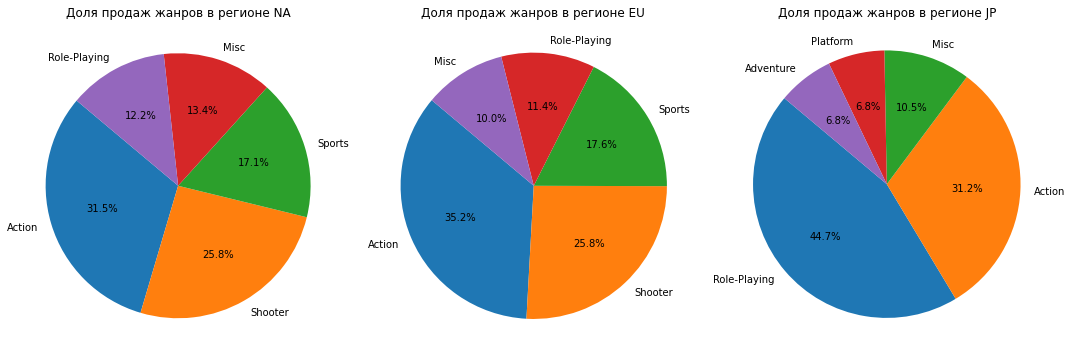

In [40]:
#Группировка данных по регионам и подсчет суммарных продаж для каждого жанра
na_genre_sales = game_data_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = game_data_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = game_data_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

#Выбор топ-5 жанров для каждого региона
top_na_genre = na_genre_sales.head(5)
top_eu_genre = eu_genre_sales.head(5)
top_jp_genre = jp_genre_sales.head(5)

#Подсчет общих продаж для каждого жанра в каждом регионе
total_na_genre_sales = na_genre_sales.sum()
total_eu_genre_sales = eu_genre_sales.sum()
total_jp_genre_sales = jp_genre_sales.sum()

#Подсчет доли продаж каждоого жанра в каждом регионе
na_genre_sales_share = (top_na_genre / total_na_genre_sales) * 100
eu_genre_sales_share = (top_eu_genre / total_eu_genre_sales) * 100
jp_genre_sales_share = (top_jp_genre / total_jp_genre_sales) * 100

#Создание сетки графиков размером 1x3
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#Создание круговой диаграммы для региона NA
axs[0].pie(na_genre_sales_share, labels=top_na_genre.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Доля продаж жанров в регионе NA')
axs[0].axis('equal')  # Делаем круговую диаграмму круглой

#Создание круговой диаграммы для региона EU
axs[1].pie(eu_genre_sales_share, labels=top_eu_genre.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Доля продаж жанров в регионе EU')
axs[1].axis('equal')  # Делаем круговую диаграмму круглой

# Создание круговой диаграммы для региона JP
axs[2].pie(jp_genre_sales_share, labels=top_jp_genre.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Доля продаж жанров в регионе JP')
axs[2].axis('equal')  # Делаем круговую диаграмму круглой

plt.show()

В NA лучше всего продаются игры жанра 'Action', за ним следует 'Shooter' и после 'Sport'. В целом, вполне объяснимо. Экшн, это такие игры как GTA, RDR, Halo, Uncharted - в общем, откинуться на диване с контроллером и позалипать. Шутаны на втором месте по популярности, Call of Duty, например, довольно популярна в Штатах. Замыкает тройку 'Sport', так любимый в Америке баскет, американский футбол и бейсбол.   
В Европе мы видим высокую популярность Экшн игр. Учитывая популярность консолей, а именно высокие показатели для консолей Сони, можно предположить, что это, в основном, консольные тайтлы. Те же GTA, RDR, Halo, Uncharted, God of War. На втором месте также Шутеры. Замыкают тройку спортивные игры, много людей в Европе играют в Фифу и НХЛ. Также видим, что жанр РПГ входит в топ-5 по популярности. 
В Японии наблюдается совсем друга картина. Здесь на первом месте ролевые игры. Не удивительно, существует куча азиатских ММО-РПГ, которые очень популярны в странах Азии, но не пользуются особой популярностью в Европе или США, например, Perfect World, Aion, Вторая линейка. Далее Экшн, Дургое, Платформеры и Адвенчуры.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
'''#Исключаем игры с рейтингом "unknown"
game_data_esrb_filtered = game_data[game_data['rating'] != 'unknown'].copy()

#Задаем порядок сортировки
esrb_order = ['E', 'E10+', 'T', 'M', 'AO', 'RP']

#Создаем новый столбец с порядком сортировки для каждого рейтинга
game_data_esrb_filtered['rating_order'] = game_data_esrb_filtered['rating'].apply(lambda x: esrb_order.index(x))

#Суммируем общие продажи для каждого рейтинга ESRB
esrb_total_sales_na = game_data_esrb_filtered.groupby('rating')['na_sales'].sum()
esrb_total_sales_eu = game_data_esrb_filtered.groupby('rating')['eu_sales'].sum()
esrb_total_sales_jp = game_data_esrb_filtered.groupby('rating')['jp_sales'].sum()

#Сортируем результат по заданному порядку
esrb_total_sales_na = esrb_total_sales_na.loc[esrb_order]
esrb_total_sales_eu = esrb_total_sales_eu.loc[esrb_order]
esrb_total_sales_jp = esrb_total_sales_jp.loc[esrb_order]

#Создание диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.scatterplot(data=esrb_total_sales_na, x=esrb_total_sales_na.index, y=esrb_total_sales_na.values, ax=axes[0])
axes[0].set_title('Влияние рейтинга ESRB на продажи игр в регионе NA')
axes[0].set_xlabel('Рейтинг ESRB')
axes[0].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=esrb_total_sales_eu, x=esrb_total_sales_eu.index, y=esrb_total_sales_eu.values, ax=axes[1])
axes[1].set_title('Влияние рейтинга ESRB на продажи игр в регионе EU')
axes[1].set_xlabel('Рейтинг ESRB')
axes[1].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=esrb_total_sales_jp, x=esrb_total_sales_jp.index, y=esrb_total_sales_jp.values, ax=axes[2])
axes[2].set_title('Влияние рейтинга ESRB на продажи игр в регионе JP')
axes[2].set_xlabel('Рейтинг ESRB')
axes[2].set_ylabel('Млн. проданных копий')

plt.tight_layout()

plt.show()'''

'#Исключаем игры с рейтингом "unknown"\ngame_data_esrb_filtered = game_data[game_data[\'rating\'] != \'unknown\'].copy()\n\n#Задаем порядок сортировки\nesrb_order = [\'E\', \'E10+\', \'T\', \'M\', \'AO\', \'RP\']\n\n#Создаем новый столбец с порядком сортировки для каждого рейтинга\ngame_data_esrb_filtered[\'rating_order\'] = game_data_esrb_filtered[\'rating\'].apply(lambda x: esrb_order.index(x))\n\n#Суммируем общие продажи для каждого рейтинга ESRB\nesrb_total_sales_na = game_data_esrb_filtered.groupby(\'rating\')[\'na_sales\'].sum()\nesrb_total_sales_eu = game_data_esrb_filtered.groupby(\'rating\')[\'eu_sales\'].sum()\nesrb_total_sales_jp = game_data_esrb_filtered.groupby(\'rating\')[\'jp_sales\'].sum()\n\n#Сортируем результат по заданному порядку\nesrb_total_sales_na = esrb_total_sales_na.loc[esrb_order]\nesrb_total_sales_eu = esrb_total_sales_eu.loc[esrb_order]\nesrb_total_sales_jp = esrb_total_sales_jp.loc[esrb_order]\n\n#Создание диаграммы рассеяния\nfig, axes = plt.subplots(nrow

На диаграммах рассеивания видно, что самые прибыльные игры во всех регионах, это игры с рейтингом 'E'. Самые неприбыльные во всех регионах, это игры с рейтингами 'AO' и 'RP'. В случае со средними рейтингами - 'E10+', 'T' и 'M' - какая-то четкая корреляция не прослеживается ни в одном из регионов, но прибыль игр с этими тремя рейтингами ниже, игры с рейтингом 'E' и выше игры с рейтингами 'AO' и 'RP'. В целом, можно говорить некоторой корреляции между рейтингом  ESRB и продажами.

**UPD**

Считаю разумным исключить 'unknown' потому что это либо пропущенное значение, либо игра, ESRB которой еще не определен.

In [42]:
#Проверим сначала игры с каким рейтингом ESRB вошли в отфильтрованный датафрейм 
game_data_filtered['rating'].value_counts()

unknown    2165
E           945
T           847
M           720
E10+        603
RP            1
Name: rating, dtype: int64

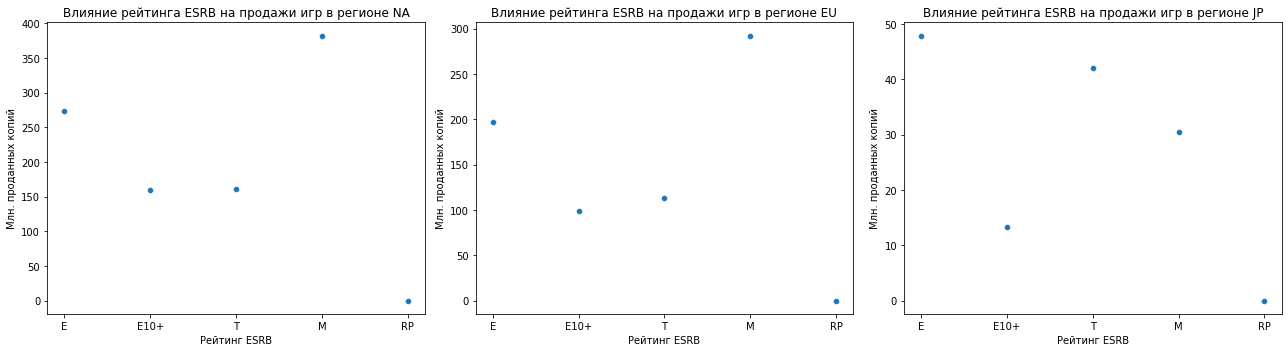

Коэффициент корреляции между рейтингом ESRB и продажами в регионе NA: 0.08884179609933375
Коэффициент корреляции между рейтингом ESRB и продажами в регионе EU: 0.10165982957061341
Коэффициент корреляции между рейтингом ESRB и продажами в регионе JP: -0.004158279386849433


In [43]:
#Исключаем игры с рейтингом "unknown"
game_data_esrb_filtered = game_data_filtered.query('rating != "unknown"').copy()

#Задаем порядок сортировки. Исключаем рейтинг AO потому что нет игр с таким рейтингом в исследуемом датафрейме
esrb_order = ['E', 'E10+', 'T', 'M', 'RP']

#Создаем новый столбец с порядком сортировки для каждого рейтинга
game_data_esrb_filtered['rating_order'] = game_data_esrb_filtered['rating'].apply(lambda x: esrb_order.index(x))

#Суммируем общие продажи для каждого рейтинга ESRB
esrb_total_sales_na = game_data_esrb_filtered.groupby('rating')['na_sales'].sum()
esrb_total_sales_eu = game_data_esrb_filtered.groupby('rating')['eu_sales'].sum()
esrb_total_sales_jp = game_data_esrb_filtered.groupby('rating')['jp_sales'].sum()

#Сортируем результат по заданному порядку
esrb_total_sales_na = esrb_total_sales_na.loc[esrb_order]
esrb_total_sales_eu = esrb_total_sales_eu.loc[esrb_order]
esrb_total_sales_jp = esrb_total_sales_jp.loc[esrb_order]

#Создание диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.scatterplot(data=esrb_total_sales_na, x=esrb_total_sales_na.index, y=esrb_total_sales_na.values, ax=axes[0])
axes[0].set_title('Влияние рейтинга ESRB на продажи игр в регионе NA')
axes[0].set_xlabel('Рейтинг ESRB')
axes[0].set_ylabel('Млн. проданных копий')


sns.scatterplot(data=esrb_total_sales_eu, x=esrb_total_sales_eu.index, y=esrb_total_sales_eu.values, ax=axes[1])
axes[1].set_title('Влияние рейтинга ESRB на продажи игр в регионе EU')
axes[1].set_xlabel('Рейтинг ESRB')
axes[1].set_ylabel('Млн. проданных копий')

sns.scatterplot(data=esrb_total_sales_jp, x=esrb_total_sales_jp.index, y=esrb_total_sales_jp.values, ax=axes[2])
axes[2].set_title('Влияние рейтинга ESRB на продажи игр в регионе JP')
axes[2].set_xlabel('Рейтинг ESRB')
axes[2].set_ylabel('Млн. проданных копий')

plt.tight_layout()

plt.show()

print("Коэффициент корреляции между рейтингом ESRB и продажами в регионе NA:", game_data_esrb_filtered['rating_order'].corr(game_data_esrb_filtered['na_sales']))
print("Коэффициент корреляции между рейтингом ESRB и продажами в регионе EU:", game_data_esrb_filtered['rating_order'].corr(game_data_esrb_filtered['eu_sales']))
print("Коэффициент корреляции между рейтингом ESRB и продажами в регионе JP:", game_data_esrb_filtered['rating_order'].corr(game_data_esrb_filtered['jp_sales']))

На диаграммах рассеивания видно, что самые прибыльные игры во всех регионах, это игры с рейтингом 'M'. Самые неприбыльные во всех регионах, это игры с рейтингами 'RP'. В Америке и Европе игры со средними рейтингами - 'E10+' и 'T' оказались среднеприбыльными. Корреляция не прослеживается ни в одном из регионов, но прибыль игр с этими двумя рейтингами ниже, игр с рейтингом 'E' и выше игры с рейтингами 'RP'. В целом, можно говорить об отсутствии корреляции между рейтингом ESRB и продажами. Это подтверждается и коэффициентами корреляции между рейтингом ESRB и продажами в отдельных регионах.

**Вывод**

В регионе NA преобладают продажи XBox 360, за ним следуют PS3, Wii, PS4 и замыкает XOne.
В Европе лидеры продаж — PS3 (33%), XBox 360 (25%), PS4 (21.6%), ПК и Wii.
В Японии чаще покупают игры для 3DS, что связано с ритмом жизни и популярностью портативных устройств. В топ-5 входят три консоли от Sony, включая PSP и PSV. В целом, Nintendo занимает 50% рынка в Японии.

В NA лучше всего продаются игры жанра 'Action', за ним следуют 'Shooter' и 'Sport'. В Европе на первом месте 'Action' игры,  'Shooter' игры идут на втором месте, а спортивные игры - на третьем. Также популярны RPG. В Японии лидируют РПГ, затем идут 'Action', 'Other', 'Platformer' и 'Adventure'.

Результаты анализа показывают, что игры с рейтингом 'M' оказались самыми прибыльными во всех регионах, в то время как игры с рейтингом 'RP' оказались наименее прибыльными. В Америке и Европе игры с рейтингами 'E10+' и 'T' показали средний уровень прибыльности. Однако корреляция между рейтингом ESRB и продажами в отдельных регионах не прослеживается. Коэффициенты корреляции также подтверждают отсутствие сильной связи между рейтингом ESRB и объемами продаж.

#### Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

В данном случае, чтобы сформулировать нулевую и альтернативную гипотезы, мы предполагаем, что средние пользовательские рейтинги платформ Xbox One и PC равны. Это формулируется как нулевая гипотеза:

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC равны.

Затем мы формулируем альтернативную гипотезу, которая утверждает, что средние рейтинги этих платформ различаются:

Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC неравны.

Для проверки этих гипотез мы можем использовать t-тест для независимых выборок. Этот тест позволит нам определить, есть ли статистически значимые различия между средними рейтингами пользователей для Xbox One и PC. Мы выбираем t-тест, потому что он позволяет сравнивать средние значения двух групп и определять, насколько эти различия вероятно случайны.

После проведения t-теста мы сможем оценить значение p-значения. Если p-значение меньше выбранного уровня значимости (обычно 0.05), мы можем отвергнуть нулевую гипотезу и заключить, что средние пользовательские рейтинги платформ Xbox One и PC различаются. В противном случае, если p-значение больше уровня значимости, мы не можем отвергнуть нулевую гипотезу и заключаем, что нет статистически значимых различий между этими рейтингами.

Уровень значимости 0.05 (или 5%) является самым распространенным выбором, поскольку он обычно считается приемлемым для большинства исследований и экспериментов. Он обеспечивает баланс между минимизацией риска совершения ошибки первого рода и максимизацией мощности статистического теста.

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC равны.  
**H1:** Средние пользовательские рейтинги платформ Xbox One и PC неравны.

In [44]:
#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_ind(game_data.query('platform=="XOne"')['user_score'], game_data.query('platform=="PC"')['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

# Вывод результатов
if results.pvalue < alpha:
     print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC одинаковые.")

p-значение: 0.001165331289569228
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC различаются.


**UPD**

In [45]:
#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_ind(game_data_filtered.query('platform=="XOne"')['user_score'], game_data_filtered.query('platform=="PC"')['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

# Вывод результатов
if results.pvalue < alpha:
     print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC одинаковые.")

p-значение: 0.2193390090752604
Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги для Xbox One и PC одинаковые.


##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая и альтернативная гипотезы сформулированы на основе предположения о равенстве или неравенстве средних значений пользовательских рейтингов для двух жанров игр: Action и Sports.

Нулевая гипотеза (H0) утверждает, что средние пользовательские рейтинги для жанров Action и Sports равны. Это означает, что нет никаких различий между рейтингами пользователей для этих двух жанров.

Альтернативная гипотеза (H1) предполагает, что средние пользовательские рейтинги для жанров Action и Sports неравны. Это означает, что существуют различия между рейтингами пользователей для этих двух жанров.

Для проверки этих гипотез обычно применяется t-тест для независимых выборок. Такой выбор критерия обусловлен тем, что мы сравниваем две независимые группы (игры двух разных жанров), и наша цель - выяснить, есть ли статистически значимые различия между средними значениями пользовательских рейтингов этих двух групп. Тест позволяет оценить, насколько вероятно наблюдаемое различие между выборочными средними при условии, что нулевая гипотеза верна.

Уровень значимости 0.05 (или 5%) является самым распространенным выбором, поскольку он обычно считается приемлемым для большинства исследований и экспериментов. Он обеспечивает баланс между минимизацией риска совершения ошибки первого рода и максимизацией мощности статистического теста.

**H0:** Средние пользовательские рейтинги жанров Action и Sports равны.  
**H1:** Средние пользовательские рейтинги жанров Action и Sports неравны.

In [47]:
#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_ind(game_data_filtered.query('genre=="Action"')['user_score'], game_data_filtered.query('genre=="Sports"')['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

# Вывод результатов
if results.pvalue < alpha:
     print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.")

p-значение: 0.1523420257669375
Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Вывод**

Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отвергнута, т.к. нет основания утверждать, что средние пользовательские рейтинги для Xbox One и PC различаются. Вероятность их равенства выше уровня значимости.

Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута, т.к. нет основания утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются. Вероятность их равенства выше уровня значимости.

#### Шаг 6. Напишите общий вывод

Работа над сборным проектом №1 была проделана в несколько этапов.  

На первом этапе был проведен первичный осмотр данных, в ходе которого были выявлены пропущенные значения в некоторых столбцах, а также необходимость привести названия столбцов к "змеиному языку".

Второй этап заключался в проведении предобработки данных. Что было сделано:
* Все названия столбцов были приведены к нижнему регистру. 
* Типы данных исправлены в соответствии с содержимым. 
* Обработаны минимальные пропуски в столбцах с названием игр и жанров, а также пропущенные значения в годе выпуска заполнены из названия игр, где это возможно. Остальные пропуски удалены, так как их доля была менее 1.5%. 
* Пропущенные значения в столбцах с рейтингами и оценками заменены на "unknown" и "-1" соответственно. Причины пропусков могли быть различными, включая технические проблемы и ошибки ввода данных. 
* Проведена обработка явных дубликатов и добавлен столбец с суммарными продажами по всем регионам для более точного анализа данных.

Третий этап был посвящен исследовательскому анализу данных. Вот, что мы узнали:
* Видны пики продаж, связанные с ключевыми событиями в индустрии, но с 2011 года наблюдается стагнация, возможно, из-за насыщения рынка и изменений в потребительском поведении. 
* Среднее время "жизни" платформ около 7 лет, что влияет на динамику продаж. Для прогноза на 2017 год использованы данные с 2010 года. 
* Лидирующие платформы - PlayStation и Xbox. Падение продаж у Nintendo 3DS и Wii, вероятно, из-за конкуренции и технологических изменений. 
* Продажи Xbox и PlayStation примерно одинаковы, но PlayStation имеет больше успешных игр, возможно, из-за качества эксклюзивов. * Корреляция между оценками критиков и продажами выше, чем между продажами и оценками игроков. Критики оказывают большее влияние на продажи, но игроки чаще дают низкие оценки. 
* Жанры 'Shooter', 'Action', 'Role-Playing' и 'Sports' демонстрируют наибольшие продажи, с видимыми пиками в определенные годы. В целом, 'Action' и 'Role-Playing' показывают устойчивые продажи на протяжении нескольких лет. Жанры 'Puzzle' и 'Strategy' остаются менее популярными, что отражается на их низких средних продажах.

Четвертый этап ставил задачу составить портрет пользователя каждого региона. Вот что получилось:
* В регионе NA наибольшей популярностью пользуются игры для XBox 360, за ним следуют PS3, Wii, PS4 и замыкает XOne. В Европе лидеры продаж — PS3, XBox 360, PS4, ПК и Wii. В Японии  чаще покупают игры для консолей Nintendo - DS и 3DS, также в топ-5 входят три консоли от Sony, включая PSP и PSV.
* В NA лучше всего продаются игры жанра 'Action', за ним следуют 'Shooter' и 'Sport'. В Европе на первом месте 'Action' игры, 'Shooter' на втором месте, а спортивные - на третьем. В Японии лидируют РПГ, затем идут 'Action', 'Other', 'Platformer' и 'Adventure'.
* На диаграммах рассеяния видно, что наиболее прибыльными являются игры с рейтингом 'М', в то время как игры с рейтингами 'RP' оказываются наименее прибыльными. В Америке и Европе игры с рейтингами 'E10+' и 'T' показали средний уровень прибыльности. Однако корреляция между рейтингом ESRB и продажами в отдельных регионах не прослеживается.

Пятый этап заключался в проверке гипотез.  
* Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отвергнута, т.к. вероятность их равенства выше уровня значимости.  
* Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не была отвергнута, т.к. вероятность их равенства выше уровня значимости.